<h1>
  <center> Rossman Kaggle Competition Analysis
  </center>
</h1>
This is the implementation of the third result. This notebook is created for studying purposes only.

**Motivation**: learn to operate with structured and time-series data.

## Imports and options

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import os
import re

from IPython.display import display, HTML
from pandas.api.types import is_string_dtype, is_numeric_dtype


In [3]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
import warnings, sklearn
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

Using TensorFlow backend.


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
np.set_printoptions(threshold=50, edgeitems=20)
PATH = 'data/rossmann/'

## Load and view data

<center>Choose only ".csv" files from the PATH folder</center>

In [7]:
csvs = os.listdir(PATH)
condition = lambda csvfile: csvfile.endswith(".csv") and not csvfile.endswith("df.csv") and not csvfile.endswith("final.csv")
csvs = filter(condition, csvs)

In [8]:
table_names = ['train', 'store', 'store_states', 'state_names', 'googletrend', 'weather', 'test']

In [9]:
tables = [pd.read_csv(os.path.join(PATH, csvfile), low_memory=False) for csvfile in csvs]

In [10]:
for table in tables:
    display(table.sample(n=20, random_state=42, replace=True), table.shape)

,Store,State
860,861,RP
1095,1096,NW
1044,1045,SH
121,122,SH
466,467,NW
330,331,RP
87,88,ST
871,872,NW
130,131,NW
769,770,NW


(1115, 2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
860,861,c,c,740.0,NaN,NaN,1,14.0,2013.0,"Mar,Jun,Sept,Dec"
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1044,1045,a,c,26990.0,12.0,2013.0,0,NaN,NaN,NaN
121,122,a,c,58260.0,4.0,2013.0,0,NaN,NaN,NaN
466,467,a,c,20390.0,4.0,2008.0,0,NaN,NaN,NaN
330,331,a,c,670.0,NaN,NaN,1,14.0,2015.0,"Jan,Apr,Jul,Oct"
87,88,a,a,10690.0,10.0,2005.0,0,NaN,NaN,NaN
871,872,a,c,3860.0,9.0,2014.0,1,23.0,2015.0,"Mar,Jun,Sept,Dec"
130,131,c,a,920.0,7.0,2015.0,0,NaN,NaN,NaN
769,770,a,c,100.0,4.0,2015.0,0,NaN,NaN,NaN


(1115, 10)

,file,week,trend
860,Rossmann_DE_BE,2015-03-22 - 2015-03-28,56
1294,Rossmann_DE_NI,2015-01-11 - 2015-01-17,62
1130,Rossmann_DE_BW,2014-09-21 - 2014-09-27,56
1095,Rossmann_DE_BW,2014-01-19 - 2014-01-25,68
1638,Rossmann_DE_ST,2013-02-10 - 2013-02-16,54
466,Rossmann_DE_TH,2013-05-05 - 2013-05-11,52
1238,Rossmann_DE_NI,2013-12-15 - 2013-12-21,88
330,Rossmann_DE_BY,2013-07-28 - 2013-08-03,65
1482,Rossmann_DE_HE,2012-12-16 - 2012-12-22,95
130,Rossmann_DE_SN,2015-05-31 - 2015-06-06,63


(2072, 3)

,Id,Sales
15795,15796,0
860,861,0
38158,38159,0
11284,11285,0
6265,6266,0
16850,16851,0
37194,37195,0
21962,21963,0
16023,16024,0
1685,1686,0


(41088, 2)

,StateName,State
6,Hessen,HE
3,Brandenburg,BB
12,Sachsen,SN
14,SchleswigHolstein,SH
10,RheinlandPfalz,RP
7,MecklenburgVorpommern,MV
12,Sachsen,SN
4,Bremen,HB
6,Hessen,HE
9,NordrheinWestfalen,NW


(16, 2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
121958,424,1,2015-04-13,9615,1011,1,1,0,0
671155,711,4,2013-11-07,7968,561,1,1,0,0
131932,363,6,2015-04-04,8348,1097,1,0,0,0
365838,510,5,2014-08-15,7820,866,1,0,0,1
259178,426,7,2014-12-07,0,0,0,0,0,0
644167,483,7,2013-12-01,0,0,0,0,0,0
110268,999,5,2015-04-24,7288,571,1,0,0,0
732180,411,5,2013-09-13,10191,775,1,1,0,0
54886,252,5,2015-06-12,7374,650,1,0,0,0
137337,193,1,2015-03-30,9688,1009,1,1,0,1


(1017209, 9)

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
7270,Hessen,2013-12-07,6,3,2,4,1,-3,93,77,57,1029,1026,1025,31.0,14.0,10.0,24,18,40.0,0.00,6.0,Rain,213
15795,Saarland,2015-08-04,24,19,14,18,14,12,95,69,43,1020,1015,1011,31.0,12.0,6.0,32,11,NaN,5.08,6.0,Rain,236
860,NordrheinWestfalen,2015-05-11,26,19,11,12,9,7,72,51,29,1025,1021,1018,31.0,31.0,31.0,23,16,NaN,0.00,NaN,NaN,168
5390,SachsenAnhalt,2014-03-17,13,11,8,8,6,5,83,67,54,1018,1015,1014,31.0,22.0,10.0,26,19,NaN,0.00,8.0,Rain,-1
13418,SchleswigHolstein,2014-07-03,23,16,8,12,10,7,99,58,28,1023,1021,1018,31.0,18.0,6.0,21,10,NaN,0.00,8.0,NaN,220
5191,SachsenAnhalt,2013-08-30,26,19,12,12,10,8,79,50,26,1021,1020,1017,31.0,19.0,8.0,11,5,NaN,0.00,8.0,NaN,-1
11964,Hamburg,2013-03-26,2,-1,-5,-4,-6,-8,86,69,38,1022,1020,1018,10.0,10.0,10.0,35,18,48.0,0.00,4.0,Snow,67
11284,Berlin,2014-01-30,-3,-5,-7,-6,-7,-9,93,81,68,1016,1014,1013,11.0,9.0,3.0,29,23,NaN,0.00,6.0,Snow,92
5734,SachsenAnhalt,2015-02-24,7,3,-1,1,0,-1,95,75,57,1013,1005,999,31.0,16.0,8.0,21,11,NaN,0.00,8.0,NaN,-1
6265,Sachsen,2013-11-22,5,4,3,5,4,3,100,100,96,1012,1007,1003,6.0,3.0,0.0,19,11,NaN,0.25,7.0,Fog-Rain,51


(15840, 24)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
15795,15796,507,7,2015-08-30,0.0,0,0,0
860,861,9,3,2015-09-16,1.0,1,0,0
38158,38159,641,2,2015-08-04,1.0,1,0,1
11284,11285,204,5,2015-09-04,1.0,1,0,1
6265,6266,353,4,2015-09-10,1.0,0,0,1
16850,16851,758,6,2015-08-29,1.0,0,0,0
37194,37195,506,3,2015-08-05,1.0,1,0,1
21962,21963,727,7,2015-08-23,0.0,0,0,1
16023,16024,797,7,2015-08-30,0.0,0,0,0
1685,1686,1080,3,2015-09-16,1.0,1,0,0


(41088, 8)

 ## Clean the data -----> Create the dataset from raw data

In [11]:
store_states, store, googletrend, sample_submission, state_names, train, weather, test = tables
table_names = ['store_states', 'store', 'googletrend', 'sample_submission',   'state_names', 'train', 'weather', 'test']

In [12]:
train.shape, test.shape

((1017209, 9), (41088, 8))

Check the type of the StateHoliday, then convert it to the boolean type.

In [13]:
type(train["StateHoliday"][1])

str

In [14]:
train["StateHoliday"] = train["StateHoliday"] != '0'
test["StateHoliday"] = test["StateHoliday"] != '0'

Create function to merge the DataFrames, based on _pd.merge_ function. 

In [15]:
def join_dataframe(left, right, left_on, right_on=None, suffix='_y'):
    """
        Description: Join of pandas dataframes at specific fields. By default it is left outer join
                     of the right field over the left.

        Parameters: 
        ------------------------------------------
        left : pandas.DataFrame
                Basic dataframe be merged with 'right' dataframe
        right : pandas.DataFrame
                Dataframe to be merged with 'left'
        left_on : label or list or array-like
                 Column or index level names to join on in the left DataFrame. Can also be an array or list of arrays of the length of the left DataFrame. These arrays are treated as if they are columns.
        right_on : label or list or array-like
                 Column or index level names to join on in the right DataFrame. Can also be an array or list of arrays of the length of the right DataFrame. These arrays are treated as if they are columns.
        suffix : str,
                Describes the naming convention for the duplicate fields. It is just contencatenated
                 to the duplicated field name to prevent name conflicts.

        Return:
        ------------------------------------------
        pandas.DataFrame of merged 'left' and 'right' dataframes. 

    """
    if right_on is None:
        right_on = left_on
        # Do the left merge
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, suffixes=("",suffix))

Join weather and state names dataframes

In [16]:
weather = join_dataframe(weather, state_names, "file", "StateName")

Modify Google trends:

     1) Get the first day of the week instead of 'first_weekday - last_weekday'
 
     2) Choose only name of german states without any other information
 
     3) Replace _"NI"_ state with "_HB,NI_"

In [17]:
# [0] - first weekday
# [1] - last weekday
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]

In [18]:
# [0] - Rossmann
# [1] - DE
# [2] - {name of the state}
googletrend["State"] = googletrend.file.str.split('_', expand=True)[2]

In [19]:
googletrend.State.loc[googletrend.State == 'NI'] = 'HB,NI'

/home/yurii/Work/study/tf/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Create function to convert the date into many columns. It is the function from the FastAI course GitHub.

In [20]:
def add_datepart(df, fldname, drop=True, time=False):
    """add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.
    Parameters:
    -----------
    df: A pandas data frame. df gain several new columns.
    fldname: A string that is the name of the date column you wish to expand.
        If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
    drop: If true then the original date column will be removed.
    time: If true time features: Hour, Minute, Second will be added.
    Examples:
    ---------
    >>> df = pd.DataFrame({ 'A' : pd.to_datetime(['3/11/2000', '3/12/2000', '3/13/2000'], infer_datetime_format=False) })
    >>> df
        A
    0   2000-03-11
    1   2000-03-12
    2   2000-03-13
    >>> add_datepart(df, 'A')
    >>> df
        AYear AMonth AWeek ADay ADayofweek ADayofyear AIs_month_end AIs_month_start AIs_quarter_end AIs_quarter_start AIs_year_end AIs_year_start AElapsed
    0   2000  3      10    11   5          71         False         False           False           False             False        False          952732800
    1   2000  3      10    12   6          72         False         False           False           False             False        False          952819200
    2   2000  3      11    13   0          73         False         False           False           False             False        False          952905600
    """
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)
    

    - Consider this feature extraction for every time you work with datetime and time series.
    - Why?
    - Having expanded datetime data into additional fields you can capture trends / cyclical behaviour as 
    a function of time. 

In [21]:
add_datepart(weather, "Date", drop=False)
add_datepart(googletrend, "Date", drop=False)
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)

Google Trends special category to take the whole of the Germany as a single category

In [22]:
trend_de = googletrend[googletrend.file == "Rossmann_DE"]

Join all the data into a single dataframe. BTW, if there is a record in a right table and no record in the left, then there appears _Null_ value

In [23]:
store = join_dataframe(store, store_states, "Store")

In [24]:
train = join_dataframe(train, store, "Store")
test = join_dataframe(test, store, "Store")

In [25]:
train = join_dataframe(train, googletrend,["State","Year", "Week"])
test = join_dataframe(test, googletrend, ["State", "Year", "Week"])

In [26]:
train = train.merge(trend_de, "left", ["State","Date"])
test = test.merge(trend_de, "left", ["State","Date"])

The final merge of the dataframes

In [27]:
train = join_dataframe(train, weather, ["State", "Date"])
test = join_dataframe(test, weather, ["State", "Date"])

Get rid of the duplicates

In [28]:
for df in (train, test):
    for col in df.columns:
        if col.endswith("_y"):
            if col in df.columns:
                df.drop(col, inplace=True, axis=1)

replace `NaN` with `NA`, which means _Not avalilable_

In [29]:
for df in (train, test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

Extract features `"CompetitionOpenSince"` and `"CompetitionDaysOpen"`. Here is used ```apply()``` to map a function across dataframe values.

In [30]:
for df in (train, test):
    df["CompetitionOpenSince"] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear, month=df.CompetitionOpenSinceMonth, day=15))
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days

We are aware, that some of the data are wrong, so we drop it

In [31]:
for df in (train, test):
    df.loc[df.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

Add "CompetitionMonthsOpen" field, limiting the maximum to 2 years to limit number of unique categories.

In [32]:
for df in (train, test):
    df["CompetitionMonthsOpen"] = df["CompetitionDaysOpen"]//30
    df.loc[df.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24

## Durations

Extract data concerning the time series which explain the relationship between columns, such as _running averages_, _period since some event_, _period before some event_. 

So, there is a function `get_elapsed` for cumulative counting across a sorted dataframe

In [33]:
def get_elapsed(field, prev):
    # Initialize the daily timedelta
    day_one = np.timedelta64(1,'D')
    # Initialise last day and last store
    last_date = np.datetime64()
    last_store = 0
    # Result list
    res = []
    
    for s,v,d in zip(df.Store.values, df[field].values, df.Date.values):
        # Assign new last store
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v:
            last_date = d
        res.append(((d - last_date).astype('timedelta64[D]') / day_one))
    
    df[prev+field] = res
            

Apply elapsing to some columns

In [34]:
columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]
df = train[columns].append(test[columns])
events = ['StateHoliday', 'SchoolHoliday', 'Promo']

Sort dataframe values by Store and Date and elapse. First time: after some event, second time: before some event

In [35]:
def do_elapse(event, df):
    df = df.sort_values(['Store', 'Date'])
    get_elapsed(event, 'After')

    df = df.sort_values(["Store", "Date"], ascending=[True, False])
    get_elapsed(event, 'Before')

Set index to date

In [36]:
for event in events:
    do_elapse(event, df)

Convert the `Nan` values to `0`

In [37]:
df = df.set_index("Date")

In [38]:
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df[a] = df[a].fillna(0).astype(int)

Sort by date. Then count the number of events of interest in direct and backward directions

In [39]:
bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()
fwd = df[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(7, min_periods=1).sum()

Drop the store indices.

In [40]:
bwd.drop('Store',1,inplace=True)
bwd.reset_index(inplace=True)
fwd.drop('Store',1,inplace=True)
fwd.reset_index(inplace=True)
df.reset_index(inplace=True)

Merge these values onto the dataframe

In [41]:
df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [42]:
df.drop(columns,1,inplace=True)

Back up the table

In [43]:
df.to_csv('data/rossmann/final.csv')

In [44]:
df = pd.read_csv('data/rossmann/final.csv')

Convert _"Date"_ column to the _pandas.datetime_ format

In [45]:
df["Date"] = pd.to_datetime(df.Date)

Join _df_ table with _train_ and _test_

In [46]:
train = join_dataframe(train, df, ["Store", "Date"])
test = join_dataframe(test, df, ["Store", "Date"])

FastAI: _The authors also removed all instances where the store had zero sale / was closed. We speculate that this may have cost them a higher standing in the competition. One reason this may be the case is that a little exploratory data analysis reveals that there are often periods where stores are closed, typically for refurbishment. Before and after these periods, there are naturally spikes in sales that one might expect. By ommitting this data from their training, the authors gave up the ability to leverage information about these periods to predict this otherwise volatile behavior._

In [47]:
train = train[train.Sales!=0]

OK, the dataset is ready to extract features from it. These steps are practical for every time-series problem.

In [48]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year_x,Month_x,Week_x,Day_x,Dayofweek_x,Dayofyear_x,Is_month_end_x,Is_month_start_x,Is_quarter_end_x,Is_quarter_start_x,Is_year_end_x,Is_year_start_x,Elapsed_x,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State,file_x,week_x,trend_x,file,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,CompetitionOpenSince,CompetitionDaysOpen,CompetitionMonthsOpen,Unnamed: 0,AfterStateHoliday,BeforeStateHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,1,5,2015-07-31,5263,555,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,a,1270.0,9,2008,0,1,1900,NaN,HE,Rossmann_DE_HE,2015-08-02 - 2015-08-08,85,Hessen,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,NaN,0.0,1.0,Fog,13,Hessen,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,2008-09-15,2510,24,0,0,0,0,0,0,0,5.0,0.0,5.0,7.0,0.0,5.0
1,2,5,2015-07-31,6064,625,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",TH,Rossmann_DE_TH,2015-08-02 - 2015-08-08,80,Thueringen,19,13,7,9,6,3,100,62,25,1021,1019,1017,10.0,10.0,10.0,14,11,NaN,0.0,4.0,Fog,309,Thueringen,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,2007-11-15,2815,24,1,0,0,0,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",NW,Rossmann_DE_NW,2015-08-02 - 2015-08-08,86,NordrheinWestfalen,21,13,6,10,7,4,100,61,24,1022,1019,1017,31.0,14.0,10.0,14,5,NaN,0.0,2.0,Fog,354,NordrheinWestfalen,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,2006-12-15,3150,24,2,0,0,0,0,0,0,5.0,0.0,5.0,5.0,0.0,5.0
3,4,5,2015-07-31,13995,1498,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,c,620.0,9,2009,0,1,1900,NaN,BE,Rossmann_DE_BE,2015-08-02 - 2015-08-08,74,Berlin,19,14,9,9,7,4,94,61,30,1019,1017,1014,10.0,10.0,10.0,23,16,NaN,0.0,6.0,NaN,282,Berlin,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,2009-09-15,2145,24,3,0,0,0,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,29910.0,4,2015,0,1,1900,NaN,SN,Rossmann_DE_SN,2015-08-02 - 2015-08-08,82,Sachsen,20,15,10,8,6,5,82,55,26,1020,1018,1016,10.0,10.0,10.0,14,11,NaN,0.0,4.0,NaN,290,Sachsen,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,2015-04-15,107,3,4,0,0,0,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0


## Create features from the dataset

In [49]:
train.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1
Year_x,2015,2015,2015,2015,2015


We have the list of the features to convert it something that can be treated as input into a neural network:

* Categorical variables -----> One-hot / Continuous integers
* Continuous features ------> standart normal features


In [50]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend_x',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

n = len(train)
print(n)

844338


In [51]:
dep = 'Sales'
train = train[cat_vars+contin_vars+[dep, 'Date']].copy()

In [52]:
test[dep] = 0
test = test[cat_vars+contin_vars+[dep, 'Date', 'Id']].copy()

In [53]:
for v in cat_vars: train[v] = train[v].astype('category').cat.as_ordered()

In [54]:
def apply_cats(df, trn):
    """Changes any columns of strings in df into categorical variables using trn as
    a template for the category codes.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values. The category codes are determined by trn.
    trn: A pandas dataframe. When creating a category for df, it looks up the
        what the category's code were in trn and makes those the category codes
        for df.
    """
    for n,c in df.items():
        if (n in trn.columns) and (trn[n].dtype.name=='category'):
            df[n] = pd.Categorical(c, categories=trn[n].cat.categories, ordered=True)

In [55]:
apply_cats(test, train)

In [56]:
for v in contin_vars:
    train[v] = train[v].fillna(0).astype('float32')
    test[v] = test[v].fillna(0).astype('float32')

Set the sample size and set _"Date"_ as index for both training and test set

In [57]:
sample_size = len(train)

In [58]:
def scale_vars(df, mapper):
    warnings.filterwarnings('ignore', category=sklearn.exceptions.DataConversionWarning)
    if mapper is None:
        map_f = [([n],StandardScaler()) for n in df.columns if is_numeric_dtype(df[n])]
        mapper = DataFrameMapper(map_f).fit(df)
    df[mapper.transformed_names_] = mapper.transform(df)
    return mapper

In [59]:
train_sample = train.set_index("Date")
test_sample = test.set_index("Date")

In [60]:
def fix_missing(df, col, name, na_dict):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [61]:
def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not ignore_flds:
        ignore_flds=[]
    if not skip_flds:
        skip_flds=[]
    if subset:
        df = get_sample(df,subset)
    else:
        df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn:
        preproc_fn(df)
    if y_fld is None: y = None
    else:
        if not is_numeric_dtype(df[y_fld]): df[y_fld] = df[y_fld].cat.codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    else: na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items():
        na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items():
        numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale:
        res = res + [mapper]
    return res

In [62]:
def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = col.cat.codes+1

In [64]:
df, y, nas, mapper = proc_df(train_sample, 'Sales', do_scale=True)
yl = np.log(y)

In [65]:
df_test, _, nas, mapper = proc_df(test_sample, 'Sales', do_scale=True, skip_flds=['Id'],
                                  mapper=mapper, na_dict=nas)

Select the most recent 25% of data to be validation data (DO NOT SHUFFLE!)

In [67]:
train_ratio = 0.25

train_size = int(sample_size * train_ratio)
valid_indices = list(range(train_size, len(df)))

## Training

Yeah! Finally training step!

Define root mean squared percent error

In [68]:
def inv_y(a):
    # Exponent
    return np.exp(a)

def exp_rmspe(y_pred, targ):
    # Root mean squared percent error
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

# Get the max value
max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [69]:
df.head(7).T

Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Store,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000
DayOfWeek,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Year,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
Month,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Day,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
StateHoliday,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CompetitionMonthsOpen,25.000000,25.000000,25.000000,25.000000,4.000000,20.000000,25.000000
StoreType,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
Assortment,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000
PromoInterval,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000


In [87]:
batch_size = 128


In [88]:
(X_val, X_train,y_val, y_train) = sklearn.model_selection.train_test_split(df,y,
                                                                               train_size=train_ratio, 
                                                                               shuffle=False)

/home/yurii/Work/study/tf/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


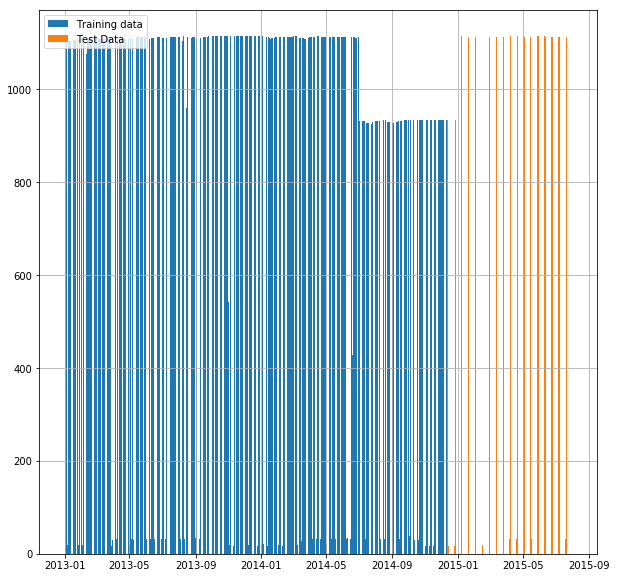

In [92]:
plt.figure(figsize=(10,10))
plt.grid()
plt.hist(X_train.index, 1000)
plt.hist(X_val.index, 1000)
plt.legend(["Training data", "Test Data"])
plt.show()

In [93]:
%%time
m = RandomForestRegressor(n_estimators=40, 
                          max_features=0.99,
                          min_samples_leaf=2,
                          n_jobs=-1, 
                          oob_score=True)
m.fit(X_train, y_train);

In [94]:
preds = m.predict(X_val)
import math
m.score(X_train, y_train), m.score(X_val, y_val), m.oob_score_, exp_rmspe(preds, y_val)

/home/yurii/Work/study/tf/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/home/yurii/Work/study/tf/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


(0.9784186564196786, 0.8589333648224726, 0.9115235064535433, nan)

In [96]:
y_pred_plot = preds[np.where(X_val["Store"] == 13)[0]]
y_val_plot = y_val[np.where(X_val["Store"] == 13)[0]]

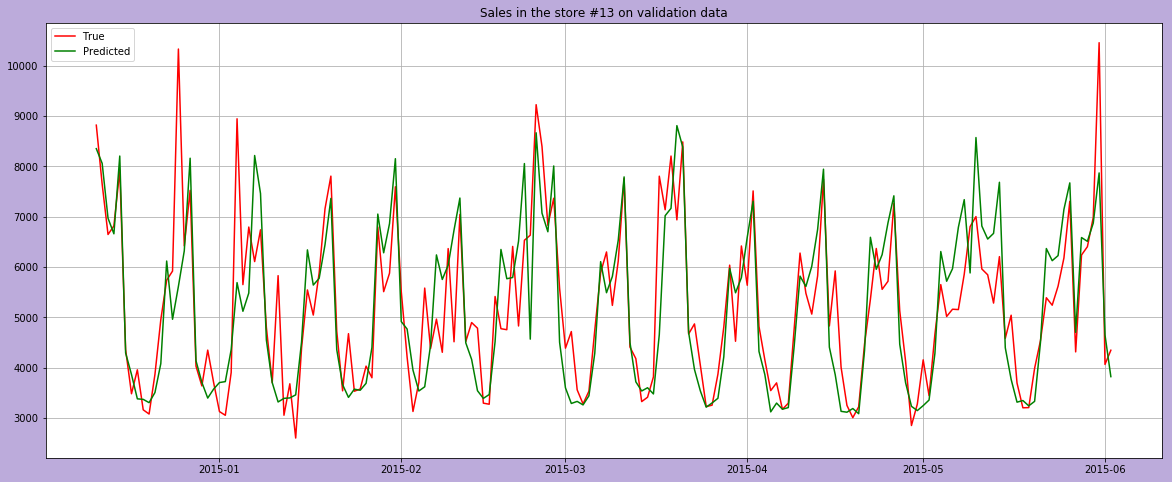

In [103]:
arg = pd.date_range(X_val.index.min(), X_val.index.max())[:len(y_pred_plot)]
plt.figure(figsize=(20,8), facecolor='#bcabdb')
plt.grid()
plt.title("Sales in the store #13 on validation data")

plt.plot(arg, y_val_plot, c='r')
plt.plot(arg, y_pred_plot, c='g')
plt.legend(["True", "Predicted"])

plt.show()

In [102]:
future_preds = m.predict(df_test)

In [114]:
future_preds_for_store_13 = future_preds[np.where(df_test["Store"] == 13)]


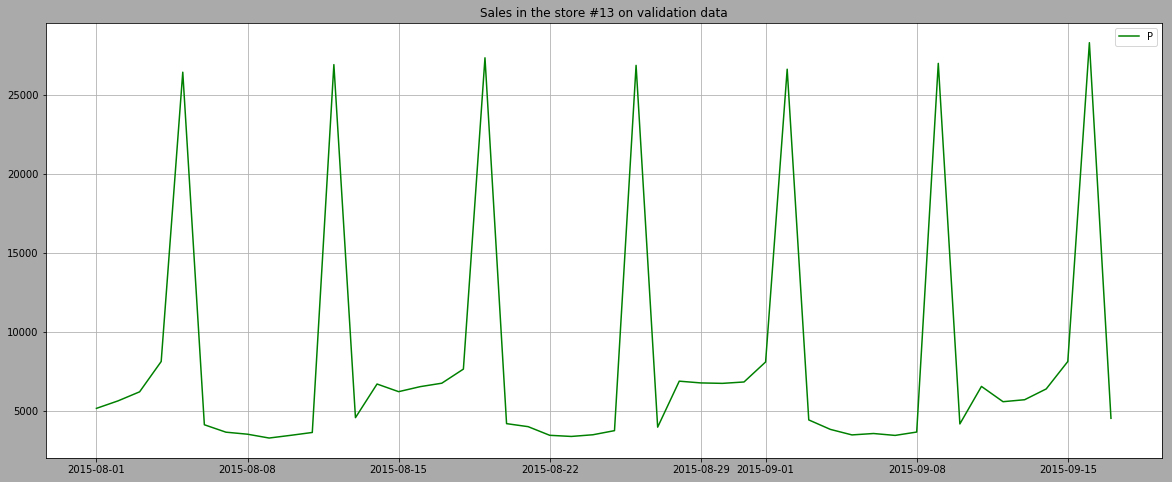

In [115]:
arg = pd.date_range(df_test.index.min(), df_test.index.max())
plt.figure(figsize=(20,8), facecolor='#aaaaab')
plt.grid()
plt.title("Sales in the store #13 on validation data")

plt.plot(arg, future_preds_for_store_13, c='g')
plt.legend("Predicted Sales")

plt.show()